<a href="https://colab.research.google.com/github/anshikagirdhar/23-CS-065_Anshika-Girdhar_ML-LAB_/blob/main/Experiment%208/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import numpy as np

In [2]:
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)

In [3]:
X.shape

(500, 2)

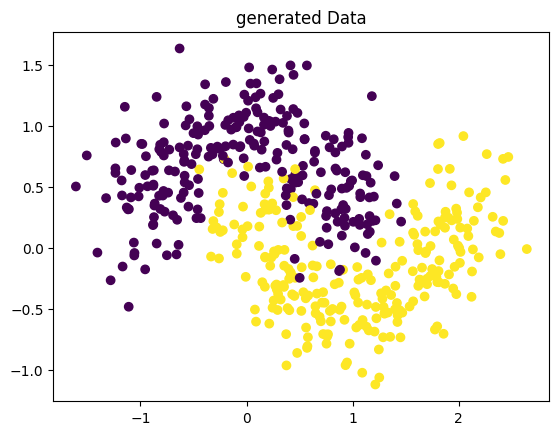

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("generated Data")
plt.show()


In [5]:
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,train_size=0.3,random_state=42)

In [7]:
C=0.1

In [9]:
linear_model=SVC(kernel='linear',C=C,random_state=42)
linear_model.fit(X_train,Y_train)

preds=linear_model.predict(X_test)

print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       168
           1       0.89      0.79      0.84       182

    accuracy                           0.84       350
   macro avg       0.85      0.85      0.84       350
weighted avg       0.85      0.84      0.84       350



In [10]:
rbf_model=SVC(kernel='rbf',C=C,random_state=42)
rbf_model.fit(X_train,Y_train)

preds=rbf_model.predict(X_test)

print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       168
           1       0.91      0.82      0.86       182

    accuracy                           0.87       350
   macro avg       0.87      0.87      0.87       350
weighted avg       0.87      0.87      0.87       350



In [11]:
poly_model=SVC(kernel='poly',degree=3,C=C,random_state=42)
poly_model.fit(X_train,Y_train)

preds=poly_model.predict(X_test)

print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86       168
           1       0.99      0.73      0.84       182

    accuracy                           0.85       350
   macro avg       0.88      0.86      0.85       350
weighted avg       0.88      0.85      0.85       350



In [13]:
def plot_decision_boundary(model, X, y, title="SVC Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                         np.linspace(y_min, y_max, 400))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

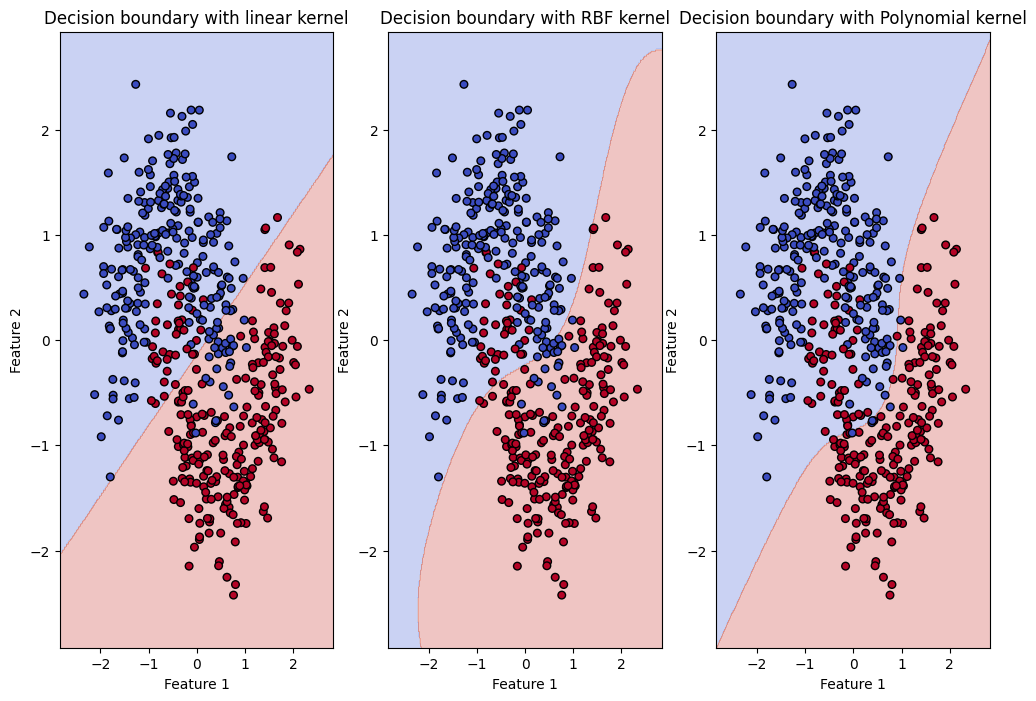

In [14]:
kernels=['linear','RBF','Polynomial']
models=[linear_model,rbf_model,poly_model]
plt.figure(figsize=(12,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plot_decision_boundary(models[i],X,y,f'Decision boundary with {kernels[i]} kernel')

plt.show()

In [15]:
param_grid = {
'C': [0.1, 1, 10, 100],
'gamma': [0.1, 1, 10, 100],
'kernel': ['rbf']
}

In [16]:
grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2,
cv=5, scoring='accuracy')

grid.fit(X_train,Y_train)
prediction=grid.predict(X_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10

In [17]:
print(classification_report(prediction,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       191
           1       0.87      1.00      0.93       159

    accuracy                           0.93       350
   macro avg       0.94      0.94      0.93       350
weighted avg       0.94      0.93      0.93       350



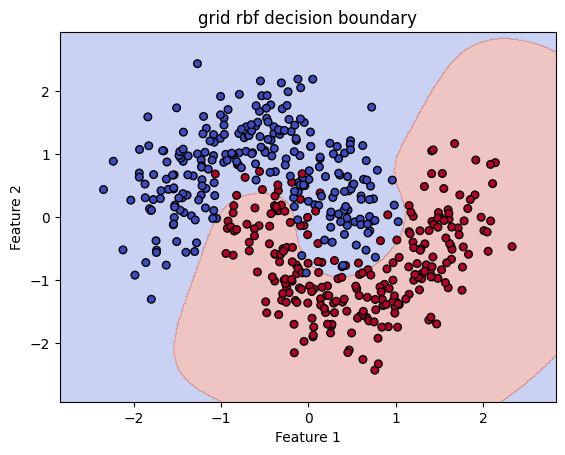

In [18]:
plot_decision_boundary(grid,X,y,'grid rbf decision boundary')
plt.show()

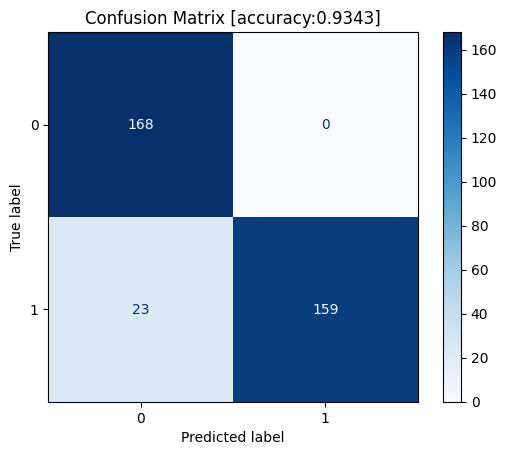

In [19]:
cm=confusion_matrix(Y_test,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix [accuracy:{((prediction==Y_test).sum()/prediction.shape[0]):.4f}]")
plt.show()
